In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
path="/content/drive/MyDrive/DAL/IOT-temp.csv"

In [7]:
data = pd.read_csv("/content/drive/MyDrive/DAL/IOT-temp.csv")
data.sample(5)

,id,room_id/id,noted_date,temp,out/in
85977,__export__.temp_log_2063_c8353dc4,Room Admin,09-09-2018 14:33,28,Out
49480,__export__.temp_log_45451_7ebfe280,Room Admin,16-10-2018 11:23,30,In
51386,__export__.temp_log_39259_5b9a052e,Room Admin,10-10-2018 02:13,33,In
16413,__export__.temp_log_147071_057a6e3d,Room Admin,31-10-2018 10:04,30,In
76739,__export__.temp_log_90345_a9a614d7,Room Admin,10-09-2018 16:25,29,In


In [8]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [9]:
data.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [10]:
print("Shape of our data is : ",data.shape)

Shape of our data is :  (97606, 5)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [12]:
print("Unique values in every column \n"+'-'*25)
for i in data.columns: print("\t"+i+" = ",len(set(data[i])))


Unique values in every column 
-------------------------
	id =  97605
	room_id/id =  1
	noted_date =  27920
	temp =  31
	out/in =  2


In [13]:
data.describe()


,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [14]:
df = data.drop(['room_id/id'],axis=1)
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [15]:
# Check for Missing Values
data.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [16]:
## Separate the date and time
date=[]
time=[]
for i in df['noted_date']:
  date.append(i.split(' ')[0])
  time.append(i.split(' ')[1])
df['date']=date
df['time']=time
df.drop('noted_date',axis=1,inplace=True)
df.head()

,id,temp,out/in,date,time
0,__export__.temp_log_196134_bd201015,29,In,08-12-2018,09:30
1,__export__.temp_log_196131_7bca51bc,29,In,08-12-2018,09:30
2,__export__.temp_log_196127_522915e3,41,Out,08-12-2018,09:29
3,__export__.temp_log_196128_be0919cf,41,Out,08-12-2018,09:29
4,__export__.temp_log_196126_d30b72fb,31,In,08-12-2018,09:29


In [17]:
df[['outside','inside']]=pd.get_dummies(df['out/in'])
df.rename(columns = {'out/in':'location'}, inplace = True)
print('Total Inside Observations :',len([i for i in df['inside'] if i == 1]))
print('Total Outside Observations :',len([i for i in df['inside'] if i == 0]))

Total Inside Observations : 77261
Total Outside Observations : 20345


In [18]:
## Let's separate date further into days,months and year
try:
  df['date'] = pd.to_datetime(df['date'])
  df['year'] = df['date'].dt.year
  df['month'] = df.date.dt.month
  df['day'] = df.date.dt.day
  df.drop('date',axis=1,inplace=True)
except:
  print('Operations already performed')
df.head() 


,id,temp,location,time,outside,inside,year,month,day
0,__export__.temp_log_196134_bd201015,29,In,09:30,1,0,2018,8,12
1,__export__.temp_log_196131_7bca51bc,29,In,09:30,1,0,2018,8,12
2,__export__.temp_log_196127_522915e3,41,Out,09:29,0,1,2018,8,12
3,__export__.temp_log_196128_be0919cf,41,Out,09:29,0,1,2018,8,12
4,__export__.temp_log_196126_d30b72fb,31,In,09:29,1,0,2018,8,12


In [19]:
print("Days of observation : ",sorted(df['day'].unique()))
print("Months of observation : ",sorted(df['month'].unique()))
print("Year of observation : ",sorted(df['year'].unique()))

Days of observation :  [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Months of observation :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Year of observation :  [2018]


In [20]:
print ("Temperature")
print("\tTotal Count = ",df['temp'].shape[0])
print("\tMinimum Value = ",df['temp'].min())
print("\tMaximum Value = ",df['temp'].max())
print("\tMean Value = ",df['temp'].mean())
print("\tStd dev Value = ",df['temp'].std())
print("\tVariance Value = ",df['temp'].var())


Temperature
	Total Count =  97606
	Minimum Value =  21
	Maximum Value =  51
	Mean Value =  35.05393111079237
	Std dev Value =  5.699825337585307
	Variance Value =  32.48800887897946


In [21]:
## Reassemble whole dataframe and print the new detailed dataframe
df = df[['day','month','year','time','temp','location','outside','inside']]
df.head()

,day,month,year,time,temp,location,outside,inside
0,12,8,2018,09:30,29,In,1,0
1,12,8,2018,09:30,29,In,1,0
2,12,8,2018,09:29,41,Out,0,1
3,12,8,2018,09:29,41,Out,0,1
4,12,8,2018,09:29,31,In,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


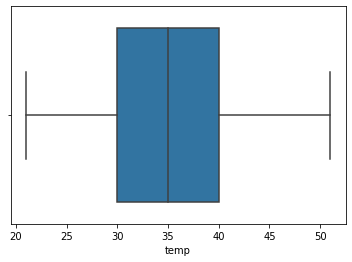

In [22]:
sns.boxplot(df['temp'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


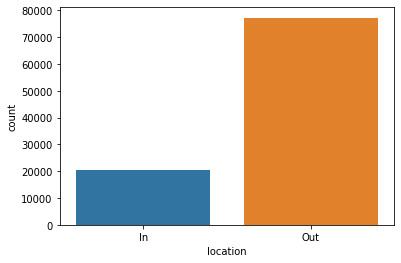

In [23]:
sns.countplot(df['location'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


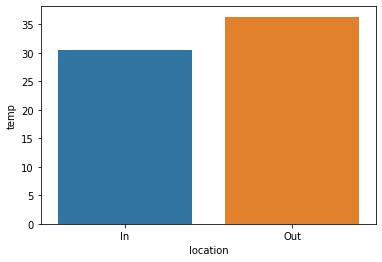

In [24]:
sns.barplot(df['location'],df['temp'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


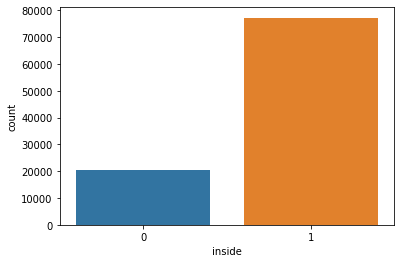

In [25]:
sns.countplot(df['inside'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


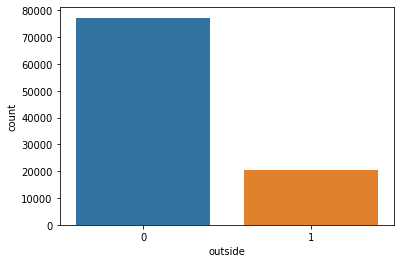

In [26]:
sns.countplot(df['outside'])


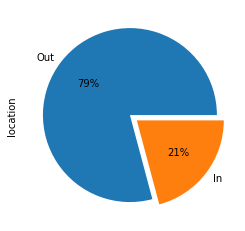

In [27]:
df['location'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.0f%%')


Text(0.5, 1.0, 'change in temperature over the dataset')

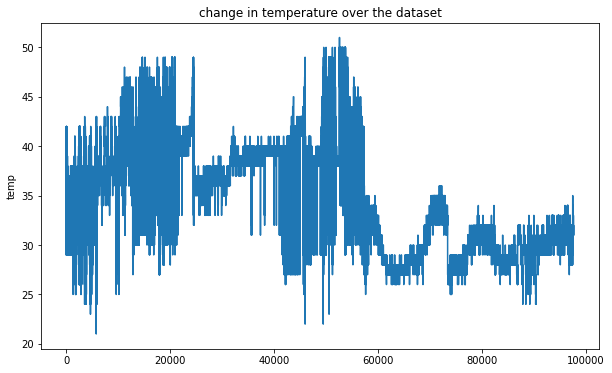

In [28]:
plt.figure(figsize=(10,6))
plt.plot(data['temp'])
plt.ylabel('temp')
plt.title('change in temperature over the dataset')


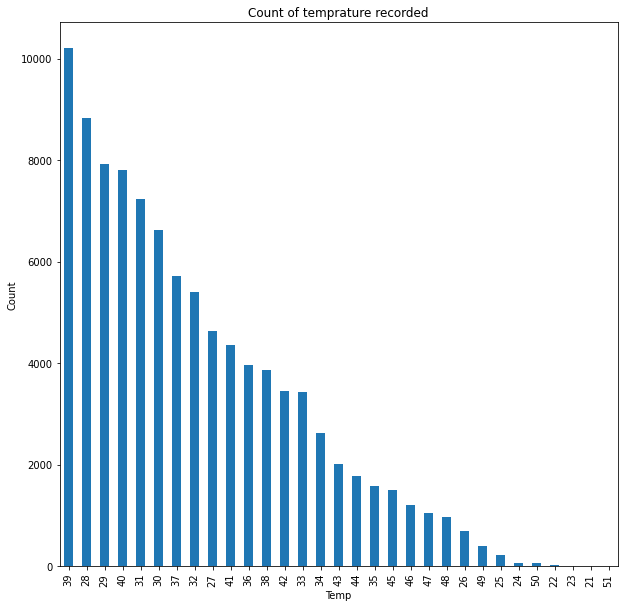

In [29]:
# histogram of the various values of temp recorded
plt.figure(figsize=(10,10))
data['temp'].value_counts().plot.bar()
plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Count of temprature recorded')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


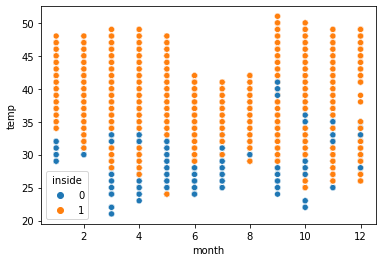

In [30]:
sns.scatterplot(df['month'],df['temp'],hue=df['inside'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Change in temperature in the month of octomber')

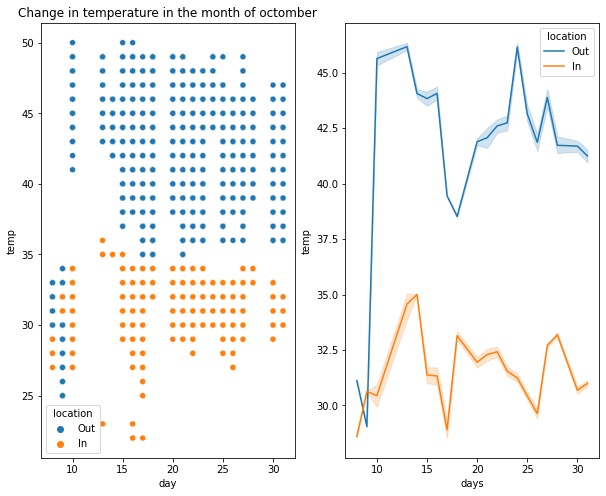

In [31]:
df['month'].value_counts()
x = df[df['month'] == 10]
f, ax = plt.subplots(1,2, figsize=(10,8))
sns.scatterplot(x['day'], x['temp'], hue=x['location'], ax=ax[0])
sns.lineplot(x['day'], x['temp'], hue=x['location'], ax=ax[1])
plt.xlabel('days')
plt.ylabel('temp')
ax[0].set_title('Change in temperature in the month of octomber')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


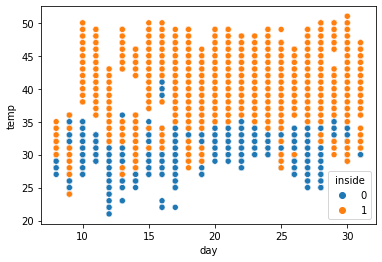

In [32]:
sns.scatterplot(df['day'],df['temp'],hue=df['inside'])


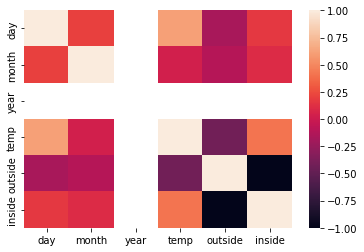

In [33]:
sns.heatmap(df.corr())

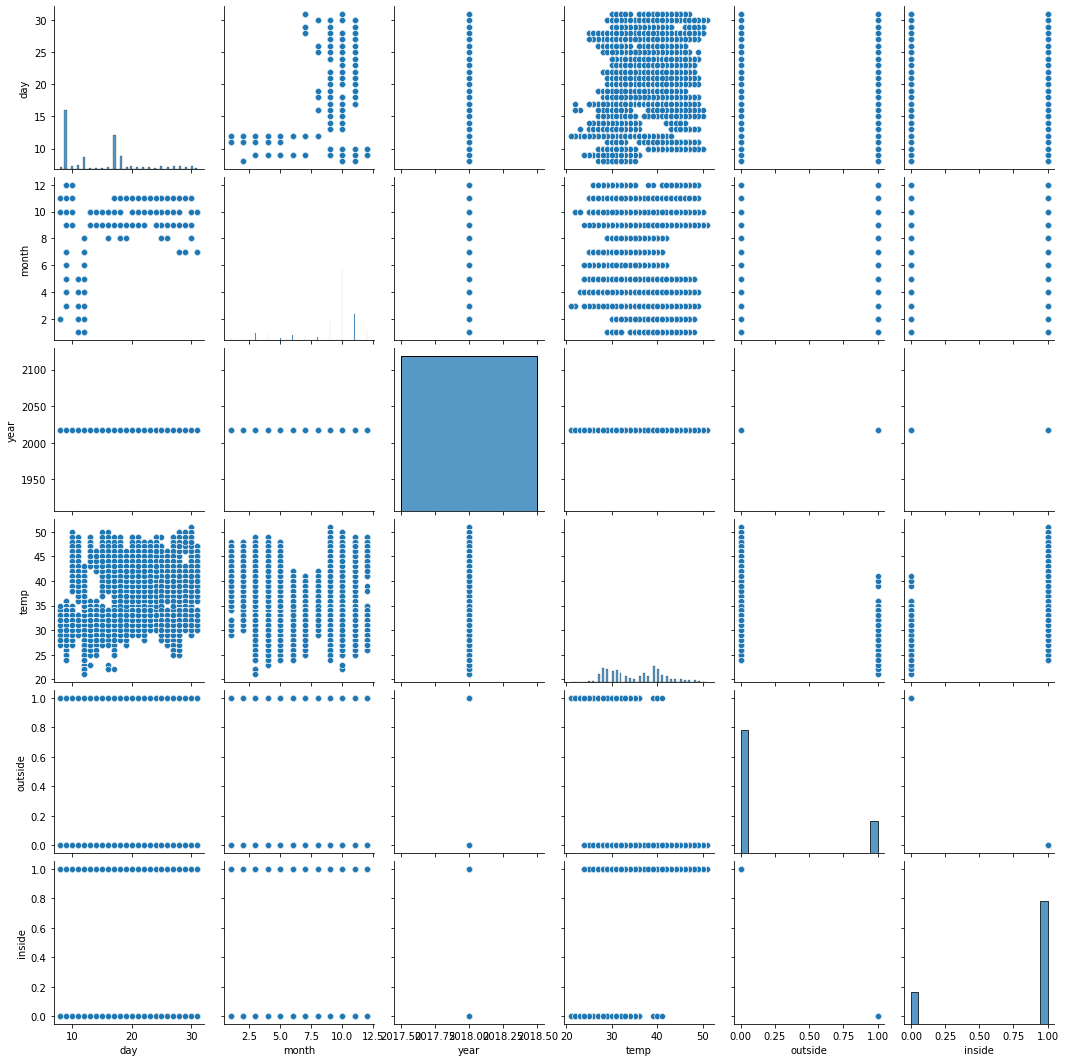

In [34]:
sns.pairplot(df)


In [35]:
## Tasks
arr = df['inside']
x=[]
y=[]
for i in arr:
  if i==1:
   x.append(i)
  else :
    y.append(i)
x=pd.Series(x)
y=pd.Series(y)
type(arr)


pandas.core.series.Series

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location v/s Temp')

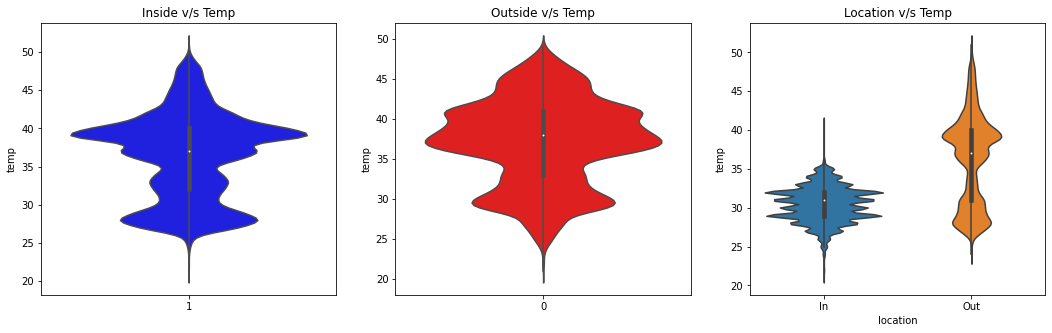

In [36]:
## Variance of temp for inside - outside room temp ?
## Outcome : The temperature outside has larger variance than inside temperature.
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.violinplot(x,df['temp'],ax=axes[0],color='b').set_title("Inside v/s Temp")
sns.violinplot(y,df['temp'],ax=axes[1],color='r').set_title("Outside v/s Temp")
sns.violinplot(df['location'],df['temp'],ax=axes[2]).set_title("Location v/s Temp")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


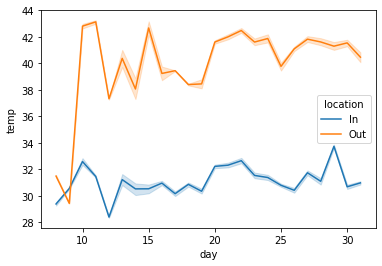

In [37]:
## How outside temp was related to inside temp ?
## Outcome: Inside temp is free from any variations in data so follows a flat/linear tren
sns.lineplot(df['day'],df['temp'],hue=df['location'])
